In [4]:
import os
import tarfile
from six.moves import urllib
import pandas as pd

def load_data(data_name, data_path = ""):
    csv_path = os.path.join(data_path, data_name)
    return pd.read_csv(csv_path)

In [5]:
games = load_data("games.csv")
games.head()

GameID        Date Tournament  TournamentGame    Team   Opponent Outcome  \
0       1  2017-11-30      Dubai               1  Canada      Spain       W   
1       2  2017-11-30      Dubai               2  Canada    Ireland       W   
2       3  2017-11-30      Dubai               3  Canada       Fiji       W   
3       4  2017-12-01      Dubai               4  Canada     France       W   
4       5  2017-12-01      Dubai               5  Canada  Australia       L   

   TeamPoints  TeamPointsAllowed  
0          19                  0  
1          31                  0  
2          31                 14  
3          24                 19  
4           7                 25

In [6]:
wellness = load_data("wellness.csv")
wellness.head()

Date  PlayerID  Fatigue  Soreness  Desire  Irritability   BedTime  \
0  2018-07-21         1        3         3       2             3  23:00:00   
1  2018-07-21         2        4         3       4             4  23:00:00   
2  2018-07-21         3        3         3       5             4  22:30:00   
3  2018-07-21         4        2         3       5             4  00:30:00   
4  2018-07-21         5        5         3       4             4  23:45:00   

   WakeTime  SleepHours  SleepQuality  MonitoringScore Pain Illness  \
0  07:00:00        8.00             2               13   No      No   
1  07:00:00        8.00             4               19  Yes      No   
2  06:30:00        8.00             4               19   No      No   
3  07:00:00        6.50             1               15   No      No   
4  07:00:00        7.25             4               20   No      No   

  Menstruation  Nutrition NutritionAdjustment USGMeasurement    USG  \
0          Yes  Excellent                 Yes             No    NaN   
1          Yes        NaN                 NaN            Yes  1.010   
2           No        NaN                 NaN            Yes  1.016   
3          Yes  Excellent                 Yes            Yes  1.025   
4           No       Okay                 Yes            Yes  1.022   

  TrainingReadiness  
0                0%  
1                0%  
2              100%  
3               95%  
4              100%

In [7]:
rpe = load_data("rpe.csv")
rpe.head()

Date  PlayerID Training        SessionType  Duration  RPE  \
0  2018-07-21        13      Yes  Mobility/Recovery       5.0  0.0   
1  2018-07-21        13      Yes               Game      29.0  7.0   
2  2018-07-21        13      Yes               Game      27.0  9.0   
3  2018-07-20        11      Yes               Game      36.0  6.0   
4  2018-07-20        11      Yes               Game      36.0  8.0   

   SessionLoad  DailyLoad  AcuteLoad  ChronicLoad  AcuteChronicRatio  \
0          0.0      446.0      323.1       303.25               1.07   
1        203.0        NaN        NaN          NaN                NaN   
2        243.0        NaN        NaN          NaN                NaN   
3        216.0      534.0      256.3       344.18               0.74   
4        288.0        NaN        NaN          NaN                NaN   

   ObjectiveRating  FocusRating BestOutOfMyself  
0              NaN          NaN      Not at all  
1              NaN          NaN      Not at all  
2              NaN          NaN      Not at all  
3              9.0         10.0      Absolutely  
4              9.0         10.0      Absolutely

In [8]:
gps = load_data("gps.csv")
gps.head()

GameID  Half  PlayerID  FrameID      Time GameClock     Speed  \
0       1     1         2        1  00:22:01  00:00:00  0.658334   
1       1     1         2        2  00:22:01  00:00:00  0.594445   
2       1     1         2        3  00:22:01  00:00:00  0.363889   
3       1     1         2        4  00:22:01  00:00:00  0.444445   
4       1     1         2        5  00:22:01  00:00:00  0.400000   

   AccelImpulse  AccelLoad   AccelX   AccelY   AccelZ  Longitude   Latitude  
0      0.611112   0.005330  0.13250  0.69875  0.56500  55.466666  24.994873  
1      0.638889   0.006568  0.11125  0.92000  0.70625  55.466666  24.994874  
2      2.305557   0.003114  0.01375  0.77000  0.67750  55.466667  24.994874  
3      0.805556   0.002602  0.00625  0.88625  0.59500  55.466667  24.994874  
4      0.444445   0.003813 -0.01750  0.85750  0.57375  55.466668  24.994874

In [9]:
import numpy as np

rpe["train_load_cat"] = (rpe["ChronicLoad"] / rpe["AcuteLoad"])
rpe["train_load_cat"].where(rpe["train_load_cat"] < 1.2, 1.2, inplace = True)

In [10]:
rpe["train_load_cat"].where(rpe["train_load_cat"] > 0.8, 0.8, inplace = True)

In [11]:
rpe["train_load_cat"].hist()

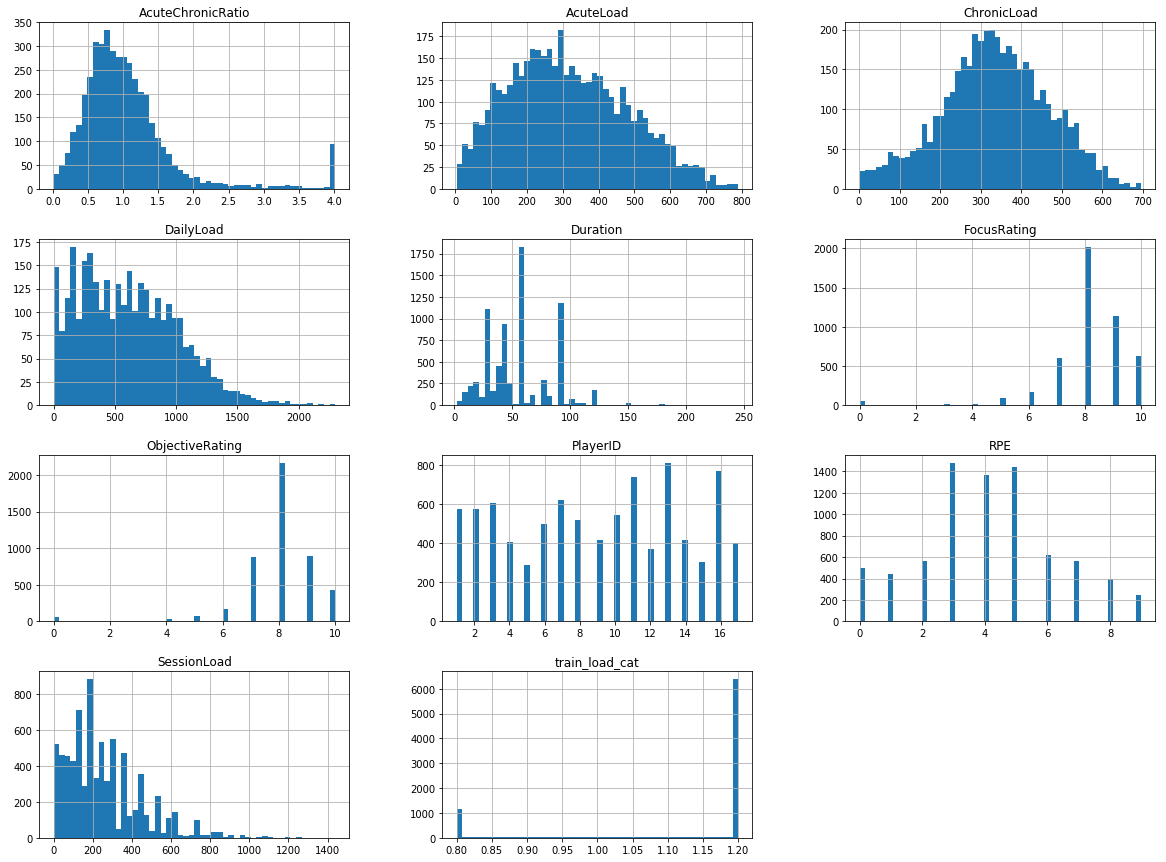

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
rpe.hist(bins = 50, figsize = (20, 15))
plt.show()

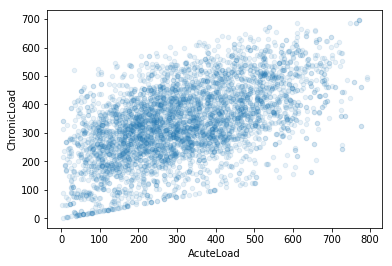

In [13]:
rpe.plot(kind = "scatter", x = "AcuteLoad", y = "ChronicLoad", alpha = 0.1)

In [14]:
wellness.plot(kind = "scatter", x = "Fatigue", y = "ChronicLoad")

KeyError: 'ChronicLoad'

In [15]:
wellness.plot(kind = "scatter", x = "AcuteLoad", y = "ChronicLoad", alpha = 0.4, figsize = (10, 7),
             c = "Fatigue", cmap = plt.get_cmap("jet"), colorbar = True)

KeyError: 'AcuteLoad'

In [16]:
wellness.plot(kind = "scatter", x = "AcuteLoad", y = "ChronicLoad", alpha = 0.4, figsize = (10, 7),
             c = "Fatigue", cmap = plt.get_cmap("jet"), colorbar = True)

KeyError: 'AcuteLoad'

In [17]:
well_pid["PlayerID"].value_counts(1)

NameError: name 'well_pid' is not defined

In [18]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [19]:
corr_w_matrix = wellness.corr()
corr_w_matrix["Fatigue"].sort_values(ascending = False)

Fatigue            1.000000
MonitoringScore    0.846338
Desire             0.580195
SleepQuality       0.525361
Soreness           0.519904
Irritability       0.481475
SleepHours         0.185780
PlayerID           0.014598
USG               -0.057746
Name: Fatigue, dtype: float64

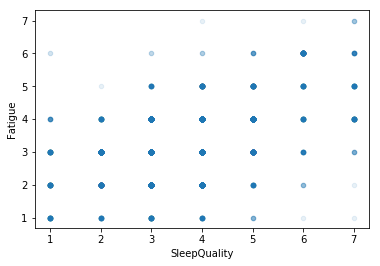

In [20]:
#We noticed that Desire and SleepQuality very closely relate to Fatigue.
#So we are going to plot a graph to see visual correlation.

#SLEEP QUALITY

wellness.plot(kind = "scatter", x = "SleepQuality", y = "Fatigue", alpha = 0.1)

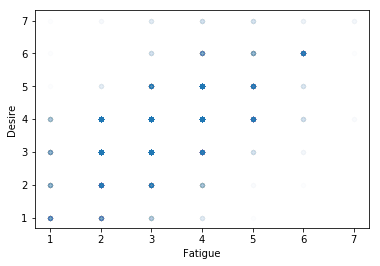

In [21]:
#DESIRE

wellness.plot(kind = "scatter", x = "Fatigue", y = "Desire", alpha = 0.01)

In [22]:
rpe["Desire"] = wellness["Desire"]

corr_r_matrix = rpe.corr()

corr_r_matrix["Desire"].sort_values(ascending = False)

Desire               1.000000
ChronicLoad          0.046190
DailyLoad            0.040594
AcuteLoad            0.039011
PlayerID             0.023199
AcuteChronicRatio    0.010706
ObjectiveRating      0.007318
FocusRating          0.004785
SessionLoad          0.004655
RPE                  0.002374
Duration            -0.001202
train_load_cat      -0.012566
Name: Desire, dtype: float64

In [23]:
games["Desire"] = wellness["Desire"]

corr_g_matrix = games.corr()

corr_g_matrix["Desire"].sort_values(ascending = False)

Desire               1.000000
TournamentGame       0.355174
TeamPointsAllowed    0.266791
GameID               0.001144
TeamPoints          -0.155834
Name: Desire, dtype: float64

In [24]:
gps["Desire"] = wellness["Desire"]

corr_gp_matrix = gps.corr()

corr_gp_matrix["Desire"].sort_values(ascending = False)

Desire          1.000000
FrameID         0.146383
Latitude        0.129942
Speed           0.121774
Longitude       0.107475
AccelLoad       0.089182
AccelImpulse    0.051251
AccelY          0.009660
AccelX          0.001353
AccelZ         -0.029700
GameID               NaN
Half                 NaN
PlayerID             NaN
Name: Desire, dtype: float64

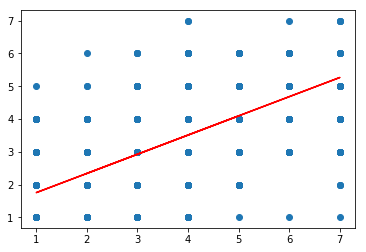

In [25]:
from sklearn.linear_model import LinearRegression

X = wellness["Desire"].values.reshape(-1, 1)  # values converts it into a numpy array
Y = wellness["Fatigue"].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()


In [26]:
#TESTING FILTER

games[games["GameID"] == 1]

GameID        Date Tournament  TournamentGame    Team Opponent Outcome  \
0       1  2017-11-30      Dubai               1  Canada    Spain       W   

   TeamPoints  TeamPointsAllowed  Desire  
0          19                  0       2

In [39]:
#WE WANT TO FILTER THE PLAYERS DESIRE ON TOURNAMENTS AND DESIRE THE REST OF THE TIME
#dates = ["2017-11-29", "2017-12-01", "2018-01-25", "2018-01-28", "2018-04-13", "2018-04-15", "2018-04-20",
#         "2018-04-22", "2018-05-11", "2018-05-13", "2018-06-07", "2018-06-10", "2018-07-19"]
dates = ["2017-11-29", "2018-01-25", "2018-04-13", "2018-04-20",
        "2018-05-11", "2018-06-07", "2018-07-19"]

tourn_wellness = pd.concat([wellness[wellness["Date"] == date] for date in dates])
display(tourn_wellness)


Date  PlayerID  Fatigue  Soreness  Desire  Irritability   BedTime  \
3199  2017-11-29         1        2         3       2             4  22:30:00   
3200  2017-11-29         3        4         4       4             4  21:30:00   
3201  2017-11-29         4        3         4       4             4  22:00:00   
3202  2017-11-29         5        4         3       5             4  23:00:00   
3203  2017-11-29         6        4         4       4             4  22:00:00   
3204  2017-11-29         7        4         4       5             4  21:30:00   
3205  2017-11-29         8        6         5       6             3  22:00:00   
3206  2017-11-29         9        6         6       6             6  22:00:00   
3207  2017-11-29        10        3         4       4             4  22:00:00   
3208  2017-11-29        11        3         3       4             4  22:00:00   
3209  2017-11-29        12        4         5       5             4  22:00:00   
3210  2017-11-29        13        4         4       5             4  22:45:00   
3211  2017-11-29        14        3         3       3             3  23:00:00   
3212  2017-11-29        16        3         4       6             4  23:30:00   
2365  2018-01-25         1        1         2       1             3  22:30:00   
2366  2018-01-25         2        5         5       5             3  21:30:00   
2367  2018-01-25         3        4         4       4             4  22:00:00   
2368  2018-01-25         4        4         4       5             4  22:15:00   
2369  2018-01-25         5        3         4       4             3  23:45:00   
2370  2018-01-25         6        3         3       4             4  23:15:00   
2371  2018-01-25         7        4         5       5             3  21:00:00   
2372  2018-01-25         8        4         4       4             4  21:30:00   
2373  2018-01-25         9        7         6       4             4  20:30:00   
2374  2018-01-25        10        3         4       4             4  21:45:00   
2375  2018-01-25        11        4         4       4             3  22:15:00   
2376  2018-01-25        12        5         5       5             4  21:30:00   
2377  2018-01-25        13        4         4       4             4  22:15:00   
2378  2018-01-25        14        4         4       4             4  22:00:00   
2379  2018-01-25        15        3         5       3             4  23:00:00   
2380  2018-01-25        16        3         4       4             4  22:45:00   
...          ...       ...      ...       ...     ...           ...       ...   
898   2018-05-11        16        3         4       5             4  23:00:00   
899   2018-05-11        17        4         4       4             4  22:00:00   
545   2018-06-07         1        4         5       3             3  23:00:00   
546   2018-06-07         2        4         5       4             4  22:45:00   
547   2018-06-07         3        4         3       4             4  22:00:00   
548   2018-06-07         4        2         4       4             1  02:00:00   
549   2018-06-07         5        4         4       5             5  08:30:00   
550   2018-06-07         6        4         2       4             4  23:15:00   
551   2018-06-07         7        3         3       4             4  23:30:00   
552   2018-06-07         8        5         5       5             5  23:00:00   
553   2018-06-07        10        1         2       3             1  00:45:00   
554   2018-06-07        11        3         3       4             4  23:00:00   
555   2018-06-07        12        4         3       3             4  22:00:00   
556   2018-06-07        13        4         4       4             4  23:00:00   
557   2018-06-07        14        4         3       4             2  22:30:00   
558   2018-06-07        15        5         5       4             4  21:45:00   
559   2018-06-07        16        3         5       5             5  23:00:00   
560   2018-06-07        17        4        

In [40]:
tourn_wellness.count()

Date                   103
PlayerID               103
Fatigue                103
Soreness               103
Desire                 103
Irritability           103
BedTime                103
WakeTime               103
SleepHours             103
SleepQuality           103
MonitoringScore        103
Pain                   103
Illness                103
Menstruation           102
Nutrition               85
NutritionAdjustment     85
USGMeasurement         103
USG                     79
TrainingReadiness      103
dtype: int64

In [41]:
#tourn_wellness.head(100).plot.bar(x = "Date", y = "Desire", figsize=(15,5))

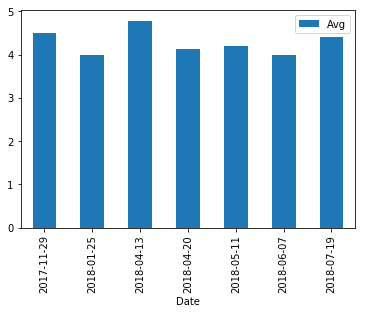

In [42]:
#Creating a Desire Chart

avgs = []
for date in dates:
    curr_date = tourn_wellness['Desire'][tourn_wellness["Date"] == date]
    avgs.append(curr_date.sum() / len(curr_date))



avg_df = pd.DataFrame({
    'Date': dates,
    "Avg": avgs
})
avg_df.plot.bar(x='Date', y='Avg')

In [43]:
print(avgs)

[4.5, 4.0, 4.785714285714286, 4.133333333333334, 4.2, 4.0, 4.416666666666667]


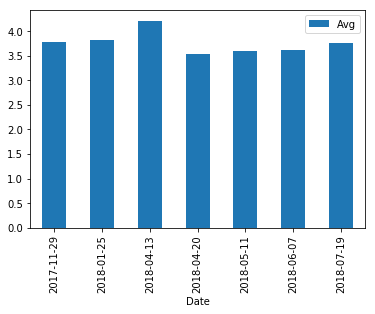

In [44]:
#Creating a Fatigue Chart

avgs = []
for date in dates:
    curr_date = tourn_wellness['Fatigue'][tourn_wellness["Date"] == date]
    avgs.append(curr_date.sum() / len(curr_date))



avg_df = pd.DataFrame({
    'Date': dates,
    "Avg": avgs
})
avg_df.plot.bar(x='Date', y='Avg')